In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
# acquire
from env import user, password, hostname, get_db_url
from pydataset import data
from sklearn.model_selection import train_test_split


import acquire
import prepare

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_iris = data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [3]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## ACQUIRE Google Sheets

In [9]:
# Grab the Google sheet url.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [10]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [11]:
df_google = pd.read_csv(csv_export_url)

In [12]:
df_google.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..                       

In [13]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
df_google.shape

(891, 12)

In [15]:

# shows columns and puts them into list more functionality 
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [16]:
df_google.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
df_google.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
for col in df_google.columns:
#     print(col)
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [19]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [20]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## ACQUIRE EXCEL

Read the train table from the train.xlsx file into a dataframe named df_excel.

In [22]:
df_excel = pd.read_excel('train.xlsx', sheet_name ='train')

In [23]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df_excel_sample = df_excel.head(100)

In [25]:
df_excel_sample.shape

(100, 12)

In [26]:
df_excel.shape[0]

891

In [27]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [28]:
df_excel.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [29]:
df_excel.select_dtypes(include='object').columns.to_list()


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [30]:
df_excel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [31]:
titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## CREATE acquire.py

In [32]:
import acquire

In [33]:
titanic_df = acquire.get_titanic_data()

In [34]:
titanic_df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [35]:
iris_df = acquire.get_iris_data()


In [36]:
iris_df.head()


,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


In [37]:
telco_df = acquire.get_telco_data()

In [38]:
telco_df.head()

,Unnamed: 0,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,Mailed check,One year,DSL
1,1,1,1,2,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Mailed check,Month-to-month,Fiber optic


## Exploratory Analysis

### Part 1
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [39]:
# get iris data
df_iris = acquire.get_iris_data()
df_iris

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2
5,5,1,setosa,6,5.4,3.9,1.7,0.4
6,6,1,setosa,7,4.6,3.4,1.4,0.3
7,7,1,setosa,8,5.0,3.4,1.5,0.2
8,8,1,setosa,9,4.4,2.9,1.4,0.2
9,9,1,setosa,10,4.9,3.1,1.5,0.1


In [40]:
df_iris.shape

(150, 8)

In [41]:
 #Drop the unnecessary column
df_iris = df_iris.drop(columns=['Unnamed: 0', 'measurement_id'])
df_iris


,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [42]:
df_iris = df_iris.rename(columns={'species_name':'species', 'species_id': "id"})
df_iris

,id,species,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [43]:
def my_train_test_split(df, target = None):
    if target:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
        train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(train, test_size=.25, random_state=123)
    return train, validate, test

In [44]:
target = 'species'

In [45]:
train_iris, validate_iris, test_iris = my_train_test_split(df_iris, target = 'species')

In [46]:
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

Prepared df: (150, 6)

Train: (90, 6)
Validate: (30, 6)
Test: (30, 6)


#### 2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

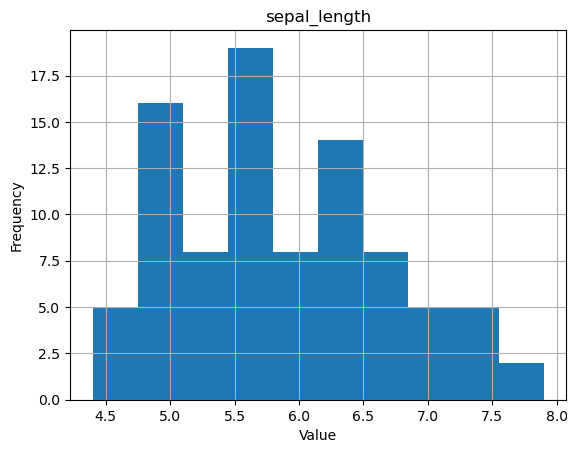

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64



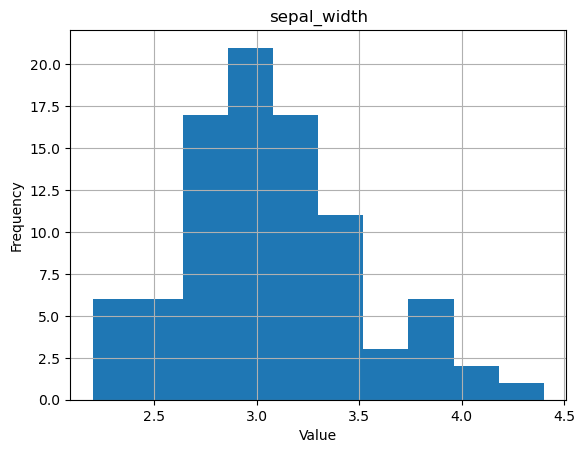

count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64



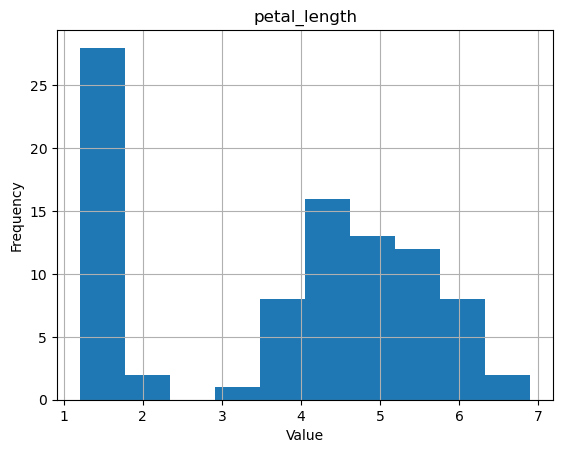

count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64



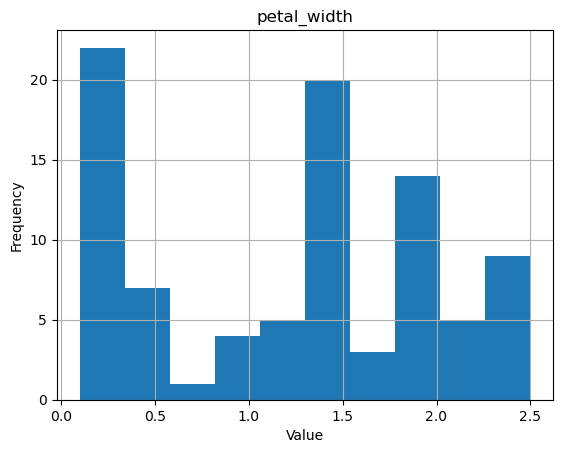

count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64



In [47]:
iris_quant_values = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']



for variable in iris_quant_values:
    train_iris[variable].hist()
    plt.title(variable)
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    plt.show()
    print(train_iris[variable].describe())
    print()



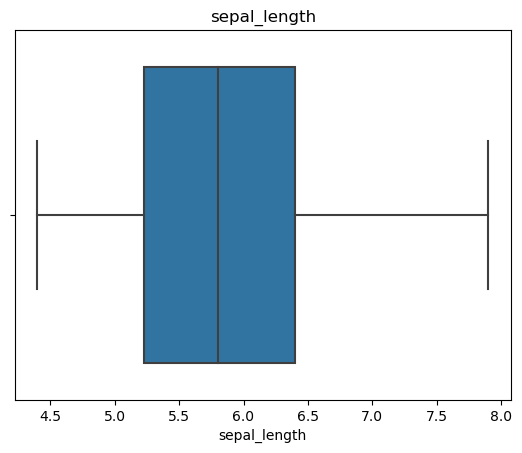

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64



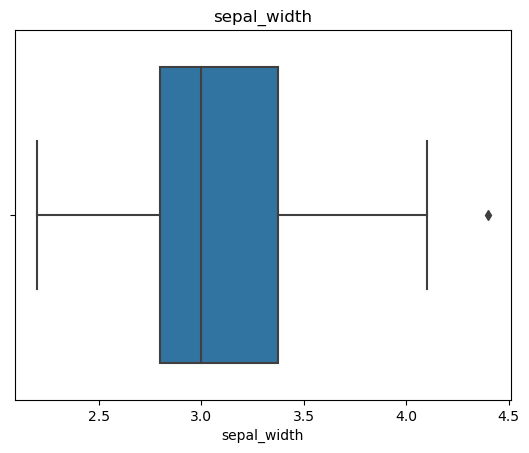

count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64



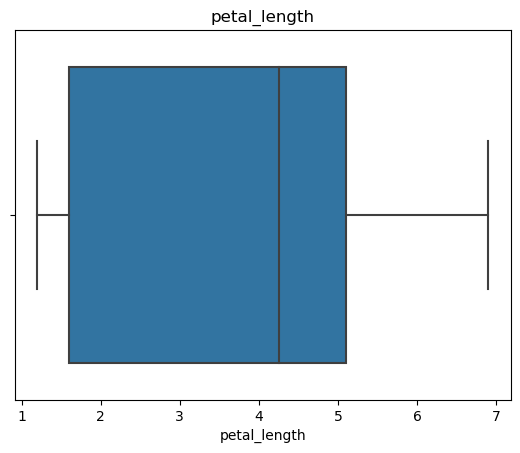

count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64



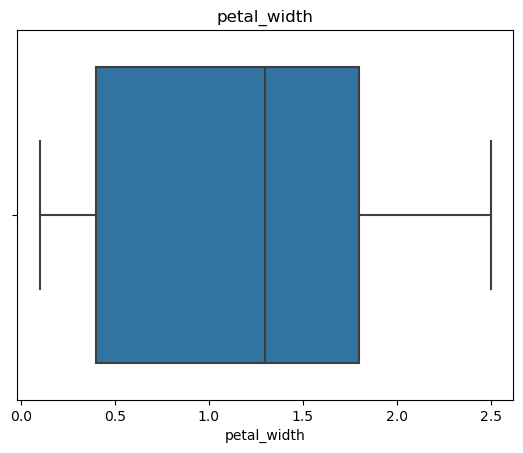

count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64



In [48]:
iris_quant_values = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for variable in iris_quant_values:
    sns.boxplot(x=variable, data=train_iris)
    plt.title(variable)
    plt.show()
    print(train_iris[variable].describe())
    print()

   

In [49]:
 # Compute descriptive statistics

iris_stats = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].describe()
iris_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

versicolor    33.333333
virginica     33.333333
setosa        33.333333
Name: species, dtype: float64


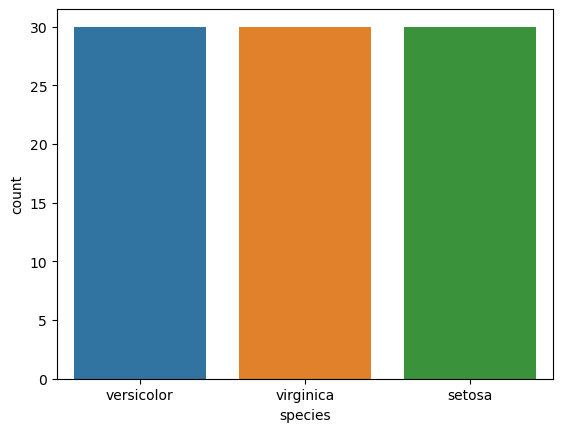

In [50]:
categorical_vars = ['species']

# Frequency table
iris_freq = df_iris['species'].value_counts()

for col in categorical_vars:
    print(train_iris[col].value_counts(normalize=True) * 100)
    sns.countplot(x=col, data=train_iris)
    plt.show()


Document takeaways & any actions.

#### 3. Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

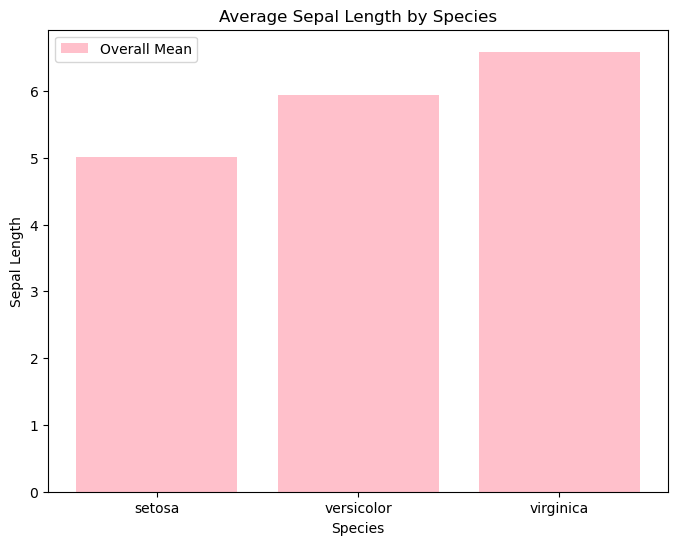

In [51]:
# Frequency table
species_freq = df_iris['sepal_length'].value_counts()


plt.figure(figsize=(8, 6))
plt.bar(df_iris['species'].unique(), df_iris.groupby('species')['sepal_length'].mean(), color='pink', linestyle='--')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Average Sepal Length by Species')
plt.legend(['Overall Mean'])
plt.show()

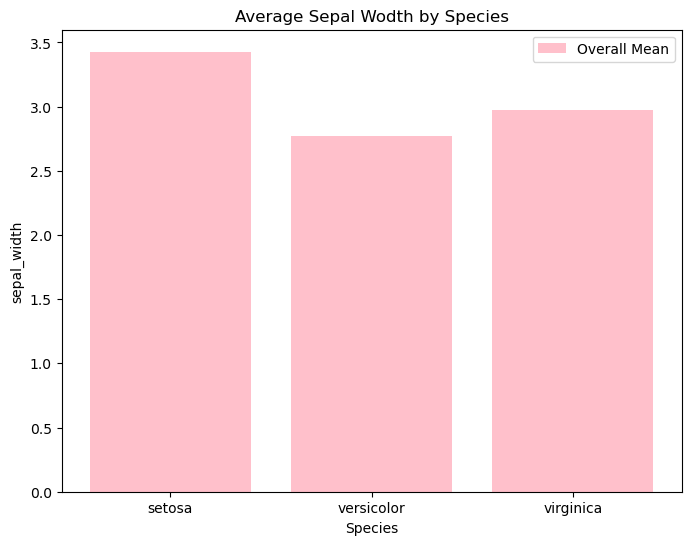

In [52]:
# # Frequency table
# species_freq = df_iris['sepal_width'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_iris['species'].unique(), df_iris.groupby('species')['sepal_width'].mean(), color='pink', linestyle='--')
plt.xlabel('Species')
plt.ylabel('sepal_width')
plt.title('Average Sepal Wodth by Species')
plt.legend(['Overall Mean'])
plt.show()




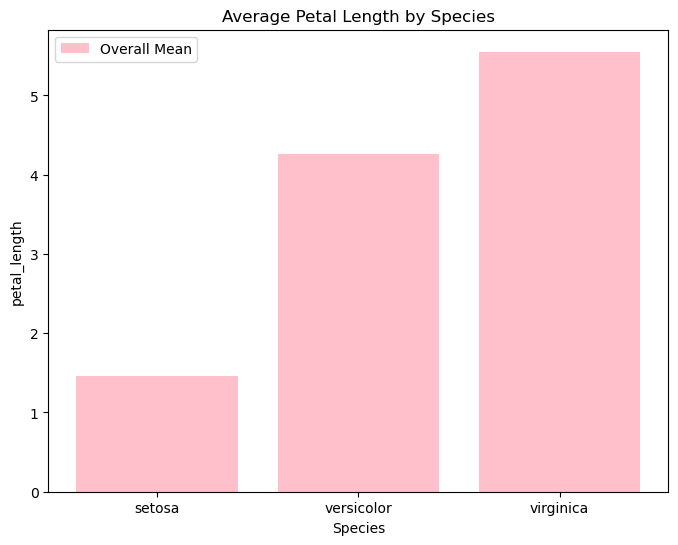

In [53]:
# Bar plot
# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_iris['species'].unique(), df_iris.groupby('species')['petal_length'].mean(), color='pink', linestyle='--')
plt.xlabel('Species')
plt.ylabel('petal_length')
plt.title('Average Petal Length by Species')
plt.legend(['Overall Mean'])
plt.show()

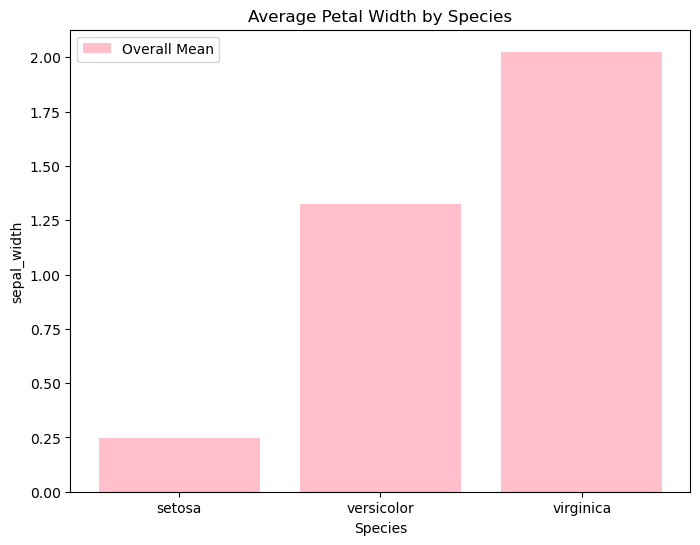

In [54]:
# Bar plot
# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_iris['species'].unique(), df_iris.groupby('species')['petal_width'].mean(), color='pink', linestyle='--')
plt.xlabel('Species')
plt.ylabel('sepal_width')
plt.title('Average Petal Width by Species')
plt.legend(['Overall Mean'])
plt.show()

#### 4. Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

In [55]:
train_iris.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,90.0,NaN,NaN,NaN,2.0,0.821071,1.0,1.0,2.0,3.0,3.0
species,90,3,versicolor,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sepal_length,90.0,NaN,NaN,NaN,5.875556,0.792282,4.4,5.225,5.8,6.4,7.9
sepal_width,90.0,NaN,NaN,NaN,3.07,0.436135,2.2,2.8,3.0,3.375,4.4
petal_length,90.0,NaN,NaN,NaN,3.782222,1.742114,1.2,1.6,4.25,5.1,6.9
petal_width,90.0,NaN,NaN,NaN,1.203333,0.755422,0.1,0.4,1.3,1.8,2.5


In [56]:
train_iris_pw_virginica = train_iris.loc[train_iris['species']== 'virginica']['petal_width']

In [57]:
train_iris_pw_versicolor = train_iris.loc[train_iris['species']== 'versicolor']['petal_width']

In [58]:
train_iris_pw_setosa = train_iris.loc[train_iris['species']== 'setosa']['petal_width']

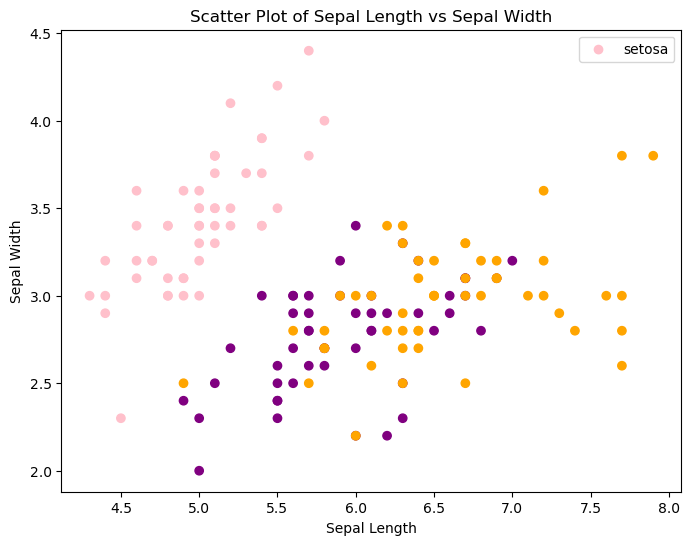

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(df_iris['sepal_length'], df_iris['sepal_width'], c=df_iris['species'].map({'setosa': 'pink', 'versicolor': 'purple', 'virginica': 'orange'}))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend(df_iris['species'])
plt.show() 


In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', color= 'plasma' data=df_iris)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3006758075.py, line 2)

<Figure size 640x480 with 0 Axes>

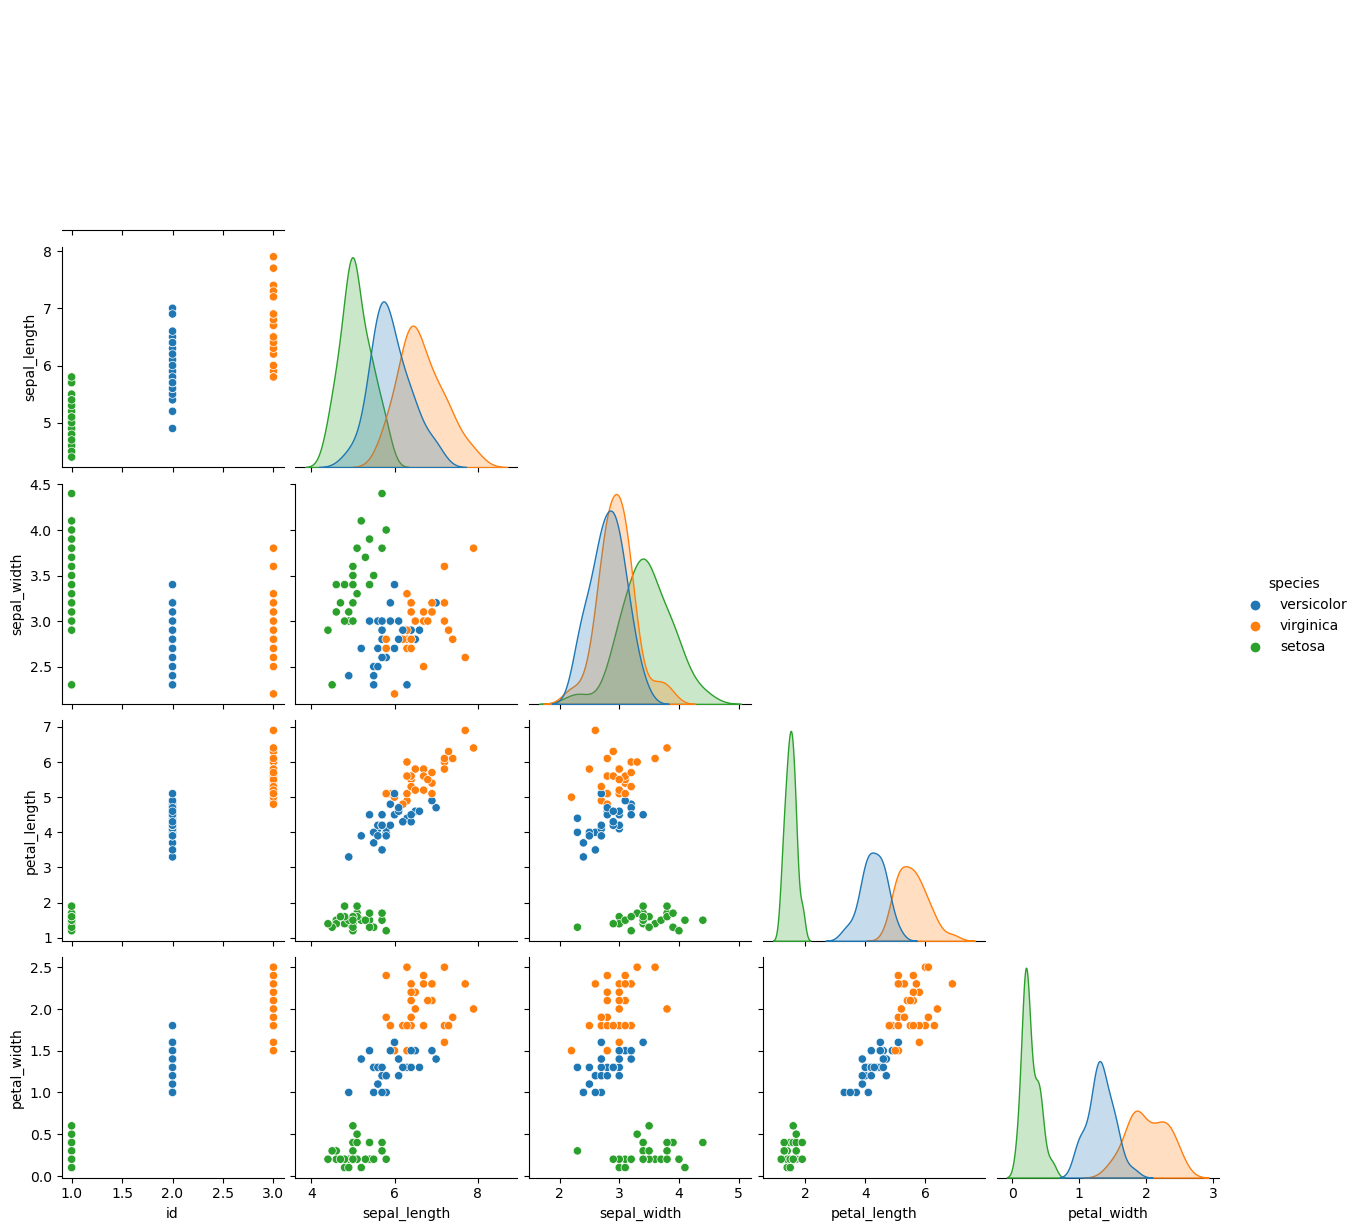

In [64]:
plt.figure()
sns.pairplot(data=train_iris, hue='species', corner=True)

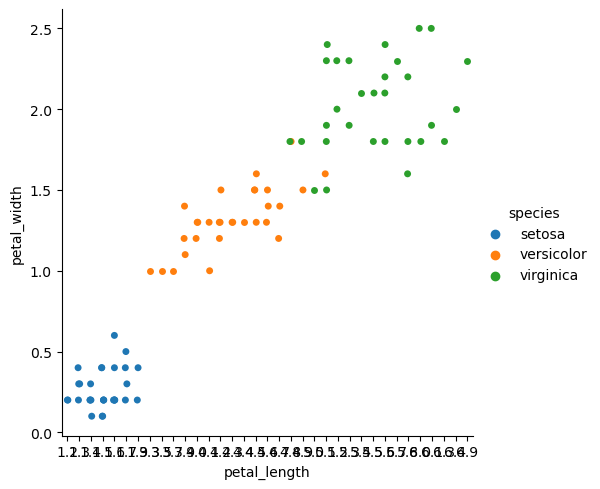

In [65]:
sns.catplot(x="petal_length", y="petal_width", data=train_iris, hue="species")

<function matplotlib.pyplot.show(close=None, block=None)>

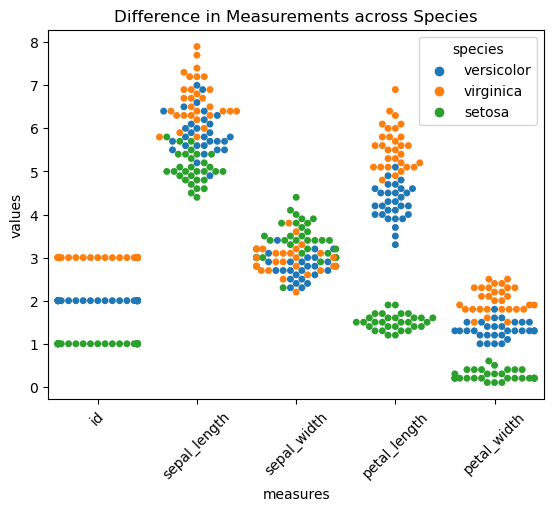

In [66]:
melted = train_iris.melt(id_vars=['species'],
               var_name='measures',
               value_name='values')
plt.title('Difference in Measurements across Species')
sns.swarmplot(x='measures',
             y='values',
             data=melted,
             hue='species'
             )
plt.xticks(rotation=45)
plt.show

## Part II
### Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [74]:
# acquire data using funciton from acquire module
titanic = acquire.get_titanic_data()

# peek into data of dataframe
titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [75]:
# clean data using funciton form prepare module
train_titanic, validate_titanic, test_titanic  = prepare.my_train_test_split(titanic, target='survived')
train_titanic.shape, validate_titanic.shape, test_titanic.shape

((534, 14), (178, 14), (179, 14))